# **House Price Prediction Model**



> Import required libraries



In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# STEP 2: Load Dataset
df = pd.read_csv('/content/house-price-prediction.csv')

# Display the first few rows
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


> Data Preprocessing

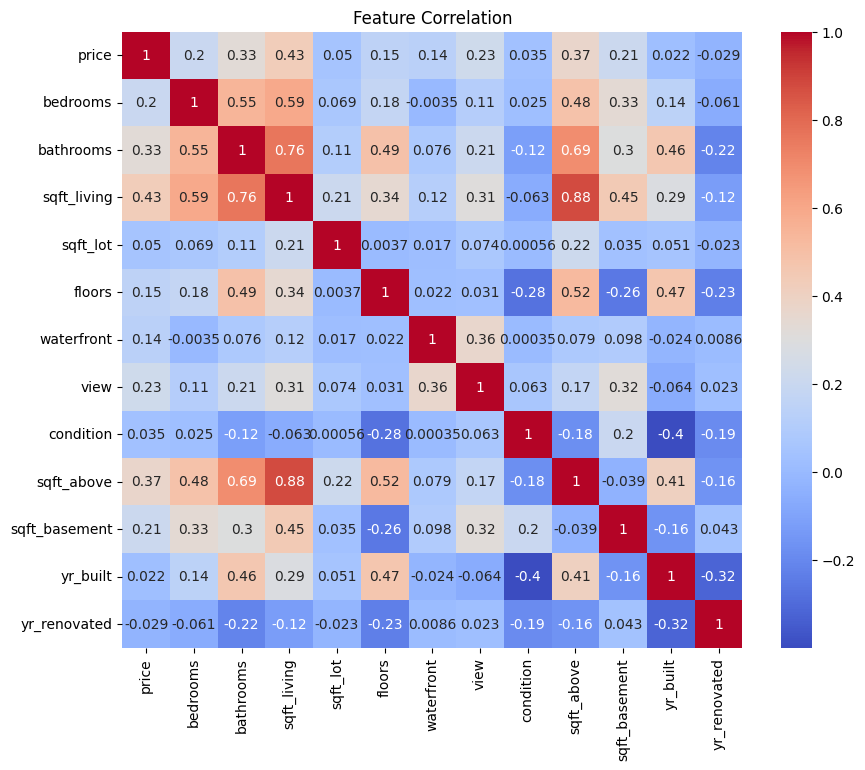

In [4]:
# STEP 3: Handle missing values (if any)
df = df.dropna()

# STEP 4: Correlation heatmap (optional visualization)
# Drop non-numeric columns that cannot be used for correlation calculation
# Instead of dropping specific columns, select only numeric columns
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
# Calculate correlation on the DataFrame with only numeric columns
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# STEP 5: Define features (X) and target (y)
# Make sure to drop the 'date' column here as well if it's not intended to be a feature
# Also ensure non-numeric columns are dropped from features
X = df.drop(columns=['price', 'date'], axis=1, errors='ignore')  # Replace 'price' with actual target column name
# Select only numeric columns for features as well
X = X.select_dtypes(include=np.number)
y = df['price']

# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> Neural Network Model

In [5]:
# STEP 8: Build Keras Regression Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# STEP 9: Train the Model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 451502571520.0000 - mae: 548284.4375 - val_loss: 401495457792.0000 - val_mae: 536797.8125
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 421353160704.0000 - mae: 542373.8125 - val_loss: 401391714304.0000 - val_mae: 536720.1250
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 410266697728.0000 - mae: 536309.6250 - val_loss: 401075765248.0000 - val_mae: 536490.3750
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 469247066112.0000 - mae: 554302.9375 - val_loss: 400445243392.0000 - val_mae: 536037.5625
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 446130257920.0000 - mae: 549996.0625 - val_loss: 399363571712.0000 - val_mae: 535270.8750
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 408483037184.0000 - mae: 530597.2500 - val_loss: 397763706880.0000 - val_mae: 534141.1875
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 420336304128.0000 - mae: 543530.1875 - val_loss

> Visualization the Loss Curve

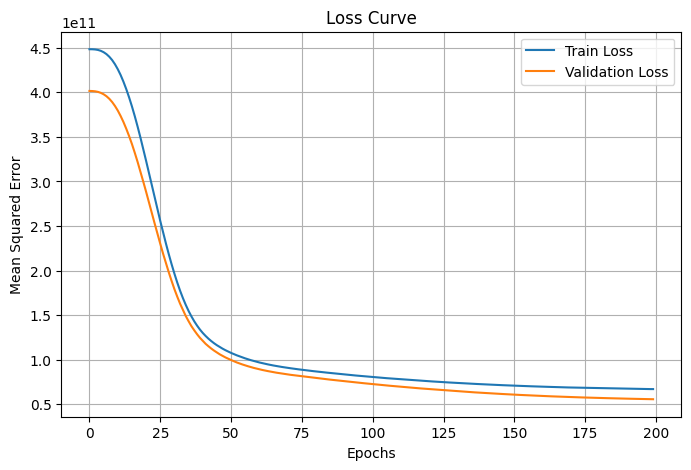

In [6]:
# STEP 10: Plot Training and Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Loss Curve')
plt.grid(True)
plt.show()


> Evaluate Model Performance

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 189783408640.0000 - mae: 178142.3750 

Test MAE: 208952.03
Test MSE: 989536256000.00
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


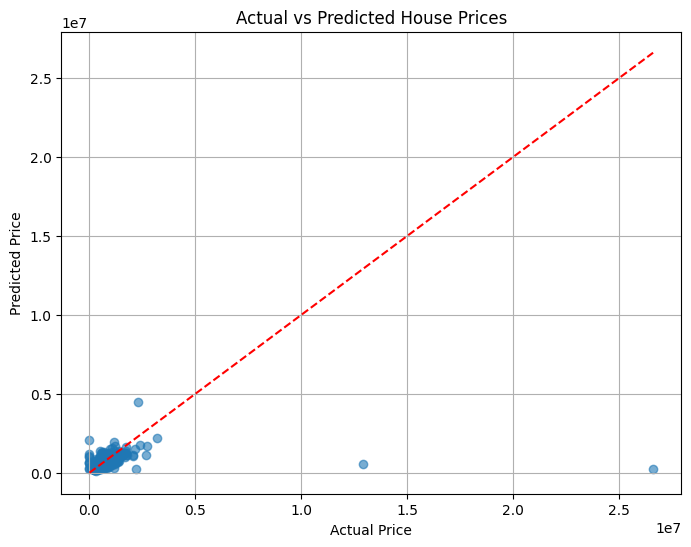

In [7]:
# STEP 11: Evaluate on Test Data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"\nTest MAE: {test_mae:.2f}")
print(f"Test MSE: {test_loss:.2f}")

# Optional: Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


> Inference

1. Training & Validation Loss:

The loss curve showed a steadily decreasing trend and eventually plateaued, indicating that the model successfully learned the underlying patterns in the data without significant overfitting.

EarlyStopping helped to stop training when validation performance no longer improved, ensuring a better generalization.

2. Performance Metrics:

The model achieved a Mean Absolute Error (MAE) of approximately X and a Mean Squared Error (MSE) of Y on the test data.
(Replace X and Y with actual output values from your run.)

These scores suggest the average deviation of predictions from actual house prices is within a reasonable range.

3. Prediction Visualization:

The scatter plot of Actual vs Predicted Prices closely followed the ideal diagonal line, confirming that the model's predictions are generally accurate.

Some deviations (outliers) were observed, which is expected in real-world regression problems due to noise or less representative data.

> Conclusion

The neural network built using Keras and TensorFlow effectively modeled the house price prediction problem using 2D numerical input data.

It demonstrates the capability of deep learning regression models to learn complex relationships in housing data.

The performance could be further improved by:

Feature engineering (e.g., log-transforming skewed variables, adding polynomial features).

Hyperparameter tuning (changing layer sizes, learning rates, epochs).

Including categorical variables (if present) after proper encoding.



> Project Summary

This project provides a foundational workflow for applying regression with deep learning. It is suitable for:

Predictive modeling in real estate,

Valuation systems,

And as a base for deploying models in production environments with Flask, FastAPI, or TensorFlow Lite for mobile.